# FN6815 Numerical Methods for Financial Instrument Pricing

# Lecture 7: Solve ODE

-   Dr. Yang Ye
-   Email: yy@runchee.com
-   2023/2024 Mini Term 5


## 1. Introduction

Differential equations are powerful tools for modeling the dynamic changes we observe in the world around us, from the blowing wind to the growth of organisms. Because they describe the change of a quantity with respect to another, to the change of the change of a quantity, differential equations have a wide range of applications in many fields, including physics, engineering, biology, and finance. For further reading, check out [The 17 equations that changed the world](https://www.businessinsider.com/equations-that-changed-the-world-2016-3?IR=T), including the corner stone of quantitative finance: Black-Scholes equation.

<div class="alert alert-block alert-success">

-   Black-Scholes Model is a Partial Differential Equation.

$$
\frac{\partial f}{\partial t}+\frac{1}{2}\sigma ^{2}S^{2}\frac{\partial^2 f}{\partial S^2}+rS\frac{\partial f}{\partial S}=rf, where\, f(S,t)
$$

</div>

There are two main types of differential equations:

-   Ordinary Differential Equations (ODEs): These equations involve an unknown function of a single variable, its derivatives, and the independent variable.

-   Partial Differential Equations (PDEs): These equations involve an unknown function of multiple variables and its partial derivatives.

#### ODE Example

-   The motion of a simple pendulum can be described by the following ODE::

    $$
    \frac{d^{2}\theta }{dt^{2}}+\frac{g}{l}\sin \theta = 0
    $$

    where $\theta$ is the pendulum's angle, $g$ is the acceleration due to gravity, and $l$ is the length of the pendulum.

#### PDE Example

-   The propagation of waves can be modeled by the following PDE, known as the wave equation:

    $$
    \frac {\partial^2 u} {\partial t^2} = c^2 \frac {\partial^2 u} {\partial x^2}
    $$

    where $u$ is the wave function, $t$ is time, $x$ is position, and $c$ is the wave speed.

</div>


## 2. Solve ODE with Euler's method

### 2.1 Steps

While there's no general formula to solve Ordinary Differential Equations (ODEs), we can approximate solutions numerically using Euler's method. Euler's method is a type of numerical procedure, or "scheme", for solving ODEs. It provides a systematic way to generate approximate solutions by iterating a specific calculation. There are several variations of Euler's method, each with its own "scheme" or strategy for approximation.

We'll use the "Forward Euler Scheme" first, followed by the "Backward Euler Scheme". Each scheme has its own strengths and weaknesses in terms of accuracy, stability, and computational efficiency.

Consider a first-order differential equation with initial values $x_{0}$ and $y_{0}$,

$$
{y}' = f(x,y), \text{where } y(x_{0}) = y_{0}
$$

Our goal is to compute the value of y at $x = B$. We can approach it with following till $x + nh$ reaches $B$, where $h$ is a small step size:

$$
y(x+h)=y_{1} \\ y(x+2h)=y_{2} \\ y(x+3h)=y_{3} \\ \dotsb
$$

In the Forward Euler Scheme, we approximate the derivative y' with the forward difference:

$$
y^\prime = \frac{y(x+h)-y(x)}{h}
$$

This leads to the update rule:

$$
y_{n+1}=y_{n}+h{y_n}^\prime = y_{n}+hf(x_{n},y_{n})
$$

This can also be derived from numerical integration (rectangle rule):

$$
y_{n+1} - y_{n} = \int_{x_{n}}^{x_{n+1}} f(x_n, y_n) dx \approx h f(x_n, y_n) \text{where} h = x_{n+1} - x_{n}
$$

So we have:

$$
y_{n+1} = y_n + h f(x_n, y_n)
$$

The Forward Euler Scheme is an example of an **explicit** method. It uses a direct formula to compute the next value of $y$ based on its current value.

In explicit methods like this, the formula for $y_{n+1}$ involves only known quantities at the current step. This makes the method straightforward to implement and computationally efficient.


The method described above uses an iterative approach to approximate the solution. At each step, it advances the solution along the path defined by the differential equation, gradually approximating the final solution. This step-by-step progression is a key characteristic of Euler's method and similar numerical methods for solving differential equations.

<img src="img/07/iterative-method-ode.png" width="400">


### 2.2 Example

Consider the following Ordinary Differential Equation (ODE):

$$
u'(x) = 3u(x) + 2.
$$

The Forward Euler scheme approximates the derivative $u'(x)$ using the forward difference:

$$
u'(x) \approx \frac{u(x+h) - u(x)}{h}
$$

Substituting the approximation into the ODE gives us the update rule for each step of the Euler method:

$$
u(x+h) = u(x) + h(3u(x)+2)
$$

This equation tells us how to update $u(x)$ at each step to gradually approximate the solution to the ODE.


We repeatedly apply the update rule, substituting $u_{n+1}$ with $u_n$, until we reach $u_N$. This iterative process forms the core of the Euler method.

$$
\begin{aligned}
u_0 & = U_0 \\
u_1 & = (1 + 3h) U_0 + 2h \\
u_2 & = (1 + 3h)^2 U_0 + (1 + 3h) 2h + 2h \Rightarrow u_2 = (1 + 3h) u_1 + 2h \\
u_3 & = (1 + 3h)^3 U_0 + (1 + 3h)^2 2h + (1 + 3h) 2h + 2h \Rightarrow u_3 = (1 + 3h) u_2 + 2h
\end{aligned}
$$

By induction, we re-write the iteration as summation. The iteration has to be computed in sequence but the summation can be computed in parallel.

$$
u_N = (1 + 3h)^N U_0 + \sum_{i = N-1}^0 (1 + 3h)^i 2h
$$


On the other hand, exact answer can be calculated with

$$
u(x) = 2e^{3u}/3 - 2/3,\, \text{where}\, u(0) = 0
$$


f_int(0) 0.0


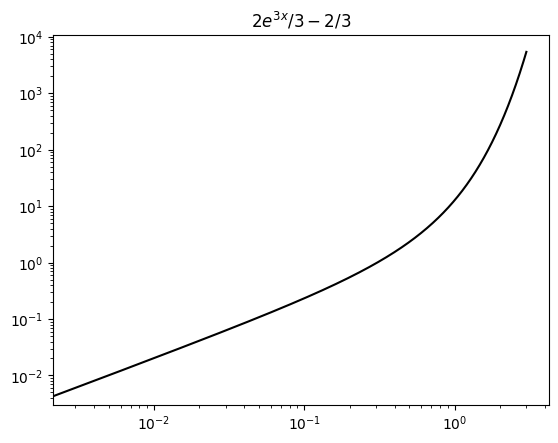

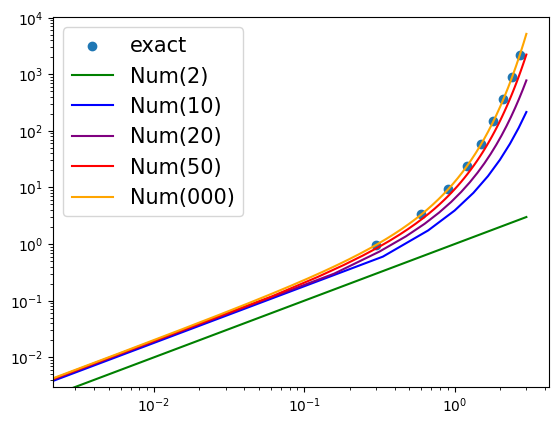

In [1]:
import matplotlib.pyplot as plt
import numpy as np

B = 3

f_int = lambda x: 2 * np.exp(3 * x) / 3 - 2 / 3

print("f_int(0)", f_int(0))

x = np.linspace(0, B, 1000)
y = f_int(x)

plt.title("$2e^{3x}/3 - 2/3$")
plt.plot(
    x,
    y,
    "k",
    label="Exact",
)

plt.yscale("log")
plt.xscale("log")
plt.show()


def euler_method(X, B, U_0, N):
    h = (B - X) / N
    u = []

    x_d = np.linspace(X, B, N)
    U = U_0
    u.append(U)
    for n in range(N - 1):
        U += h * (3 * U + 2)
        u.append(U)
    return x_d, np.array(u)


def euler_method_sum(X, B, U_0, N):
    h = (B - X) / N
    x_d = np.linspace(X, B, N)
    y_d = np.array(
        [
            (1 + 3 * h) ** N * U_0
            + np.sum([(1 + 3 * h) ** i * 2 * h for i in range(N)])
            for N in range(N)
        ]
    )
    return x_d, y_d


plt.scatter(x[::100], y[::100], label="exact")
plt.plot(*euler_method_sum(0, B, 0, 2), "green", label="Num(2)")
plt.plot(*euler_method_sum(0, B, 0, 10), "blue", label="Num(10)")
plt.plot(*euler_method_sum(0, B, 0, 20), "purple", label="Num(20)")
plt.plot(*euler_method_sum(0, B, 0, 50), "red", label="Num(50)")
plt.plot(*euler_method_sum(0, B, 0, 1000), "orange", label="Num(000)")

plt.yscale("log")
plt.xscale("log")
plt.xscale("log")
plt.legend(fontsize=15, loc="upper left")
plt.show()

### 2.2 Improve Euler’s Method


The "Forward Euler" scheme is named as such because it uses the derivative at the current point $y^\prime_{n}$ to estimate the next point $y_{n+1}$:

In contrast, the "Backward Euler" scheme uses the derivative at the next point $y^\prime_{n+1}$ to estimate the next point $y_{n+1}$. This requires solving the equation $y_{n+1} = y_{n} + h f(x_{n+1}, y_{n+1})$.

The "Backward Euler" scheme is an example of an **implicit** method. It requires solving an equation to find the next value of $y$, which can be more computationally intensive than explicit methods.

Both Forward and Backward Euler schemes have similar levels of error due to their numerical integration schemes.

To improve the precision of Euler's method, we can use smaller step sizes. However, this increases the computational cost.

Another way to improve Euler's method is to use more sophisticated schemes, such as the "Midpoint Method" or "Runge-Kutta Methods", which use additional points or weighted averages to estimate the derivative, thereby achieving higher precision.


#### 2.2.1 Generalize Central method, or Crank-Nicolson method, aka 1-D "CR".

The Crank-Nicolson method, also known as the trapezoidal method, provides a more accurate approximation for $y' = f(x_{n}, y_{n})$. It averages the derivatives at $x_n$ and $x_{n+1}$ from the trapezoidal method:

$$
\begin{aligned}
y_{n+1}-y_{n} & = \int_{x_{n}}^{x_{n+1}}f(x,y(x))dx \\
& \approx h \frac{f(x_{n},y_{n})+f(x_{n+1},y_{n+1})}{2} \\
\end{aligned}
$$

Like the Backward Euler method, we need to solve for $y_{n+1}$:

$$
y_{n+1} - \frac h 2 f(x_{n+1},y_{n+1}) = \frac h 2 {f(x_{n},y_{n})} + y_{n}
$$

Alternatively, to avoid solving for $y_{n+1}$, we can approximate $y_{n+1}^{*} \approx y_{n} + hf(x_n, y_n)$. This leads to the update rule:

$$
\begin{aligned}
y_{n+1} & = y_{n} + \frac 1 2 h \left ( f(x_n, y_n) + f(x_{n+1}, y_{n+1}^{*}) \right ), \text{where}\, y_{n+1}^{*} = y_{n} + hf(x_n, y_n)
\end{aligned}
$$

Either method provides a more accurate approximation than the Forward or Backward Euler methods, at the cost of additional computational complexity.


#### 2.2.2 Generalizing Schemes with the $\theta$-rule (Optional)

The $\theta$-rule allows us to generalize the Forward/Backward/CR schemes of Euler method by assigning a specific weight, rather than a fixed 0.5 weight to the left and right boundaries.

Given $u' = f(u,t)$, we can approximate it using a weighted average of the values of $f(u,t)$ at the end points of the interval $[t_n,t_{n+1}]$.

$$
\frac{u^{n+1}-u^n}{\Delta t} = \theta f(u^{n+1},t_{n+1}) + (1-\theta)f(u^n, t_n)
$$

Rearranging terms, we get:

$$
u^{n+1} - \Delta t \theta f(u^{n+1},t_{n+1}) = u^n + \Delta t(1-\theta)f(u^n, t_n)
$$

The $\theta$-rule unifies various schemes:

-   For $\theta =0$, we get the forward Euler scheme, an explicit scheme with a direct formula for updating $u^{n+1}$.
-   For $\theta = 1$, we get the backward Euler scheme, an implicit scheme that requires solving algebraic equations.
-   For $\theta = 0.5$, we get the Crank-Nicolson scheme.

Explicit schemes may not be numerically stable. In practice, we often choose a $\theta$ value slightly above 0.5, such as 0.55, to improve stability.

For example, if we have the differential equation $u' = u$, with $u(0) = 1$, and we want to find $u(1)$, using the forward Euler scheme ($\theta = 0$), we would update $u$ at each step as $u^{n+1} = u^n + \Delta t \cdot u^n$.


#### Example for using $\theta$-rule

Let's revisit a previous example to illustrate how the $\theta$-rule works.

Consider the ODE:

$$
u'(x) = 3u(x) + 2.
$$

Applying the $\theta$-rule, we get

$$
u_{n+1} - h \theta (3 u_{n+1} + 2) = u_n + h (1 - \theta) (3 u_n + 2)
$$

Rearranging terms, we derive the update rule:

$$
u_{n+1} = \frac {(3h + 1 - 3h \theta) u_n + 2 h} { 1 - 3 h \theta}
$$

This formula allows us to compute $u_{n+1}$ given $u_n$ for any chosen $\theta$ value. For instance, if we choose $\theta = 0$ (forward Euler scheme), the formula simplifies to $u_{n+1} = (3h + 1) u_n + 2h$.

The code below implements the $\theta$-rule for the ODE $u'(x) = 3u(x) + 2$ with initial condition $u(0) = 0$ and step size $h = 0.1$.


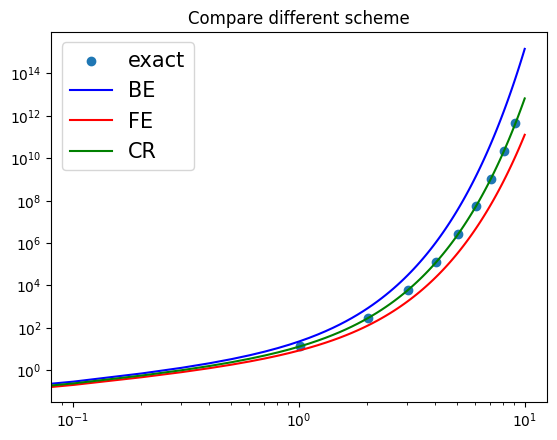

In [2]:
def dudx(ux, h, theta):
    return ((3 * h + 1 - 3 * h * theta) * ux + 2 * h) / (1 - 3 * h * theta)

    # above expression with theta would become the below form when theta = 0
    # y_d = [(1+3*h)**N*U_0 + np.sum([(1+3*h)**i *2*h for i in range(N)]) for N in range(N)]


def gen_theta(theta, N, U_0, I, B):
    u = []
    h = (B - I) / N
    u.append(U_0)
    for n in range(1, N):
        uu = dudx(u[n - 1], h, theta)
        u.append(uu)
    return u


f_int = lambda x: 2 * np.exp(3 * x) / 3 - 2 / 3

U_0 = 0.0
I = 0.0
B = 10.0
N = int(100)
plt.title("Compare different scheme")
plt.scatter(
    np.linspace(I, B, N)[-200::10], f_int(np.linspace(I, B, N)[-200::10]), label="exact"
)
plt.plot(
    np.linspace(I, B, N)[-200:], gen_theta(1, N, U_0, I, B)[-200:], "b-", label="BE"
)
plt.plot(
    np.linspace(I, B, N)[-200:], gen_theta(0, N, U_0, I, B)[-200:], "r-", label="FE"
)
plt.plot(
    np.linspace(I, B, N)[-200:], gen_theta(0.5, N, U_0, I, B)[-200:], "g-", label="CR"
)
plt.yscale("log")
plt.xscale("log")
plt.legend(fontsize=15, loc="upper left")
plt.show()
# Try label each line with the method.

#### 2.2.3 Adams method (Optional)

While the Euler method is a one-step method, we can extend this approach to multi-step methods.

A straightforward multi-step method is the two-step Adams–Bashforth method. This method uses information from the current and previous steps to estimate the next value, as shown below:

$$
y_{n+2}=y_{n+1}+\frac{3}{2}hf(x_{n+1},y_{n+1})-\frac{1}{2}hf(x_{n},y_{n})
$$

In this formula, $y_{n+2}$ is estimated based on the current value $y_{n+1}$ and the previous value $y_n$. The function $f(x_{n+1},y_{n+1})$ and $f(x_{n},y_{n})$ represent the derivative at the current and previous steps, respectively. The weights $\frac{3}{2}$ and $-\frac{1}{2}$ are chosen to provide an accurate approximation.

For example, if we have the differential equation $y' = y$, with $y(0) = 1$, and we want to find $y(1)$, using the Adams–Bashforth method, we would update $y$ at each step as $y_{n+2} = y_{n+1} + \frac{3}{2}h \cdot y_{n+1} - \frac{1}{2}h \cdot y_n$.


#### 2.2.4 2nd Order Runge–Kutta method (Optional)

The Runge–Kutta method, a powerful technique for solving differential equations, is derived from Simpson’s rule. The second-order version is as follows:

$$
y_{n+1}=y_{n}+h(\frac{k_{n1}+2k_{n2}+2k_{n3}+k_{n4}}{6})
$$

Here, the $k_{ni}$ terms are intermediate estimates of the derivative, calculated as:

$$
\begin{aligned}
k_{n1} & = f(x_{n},y_{n}), \\
k_{n2} & = f(x_{n}+\frac{h}{2},y_{n}+\frac{hk_{n1}}{2}), \\
k_{n3} & = f(x_{n}+\frac{h}{2},y_{n}+\frac{hk_{n2}}{2}), \\
k_{n4} & = f(x_{n}+h,y_{n}+hk_{n3}) \\
\end{aligned}
$$

These terms represent the slope at the beginning, two estimates at the midpoint, and the end of the interval, respectively. They are then combined to give a weighted average for the next value $y_{n+1}$.


#### 2.2.5 Recap: Euler Methods

-   Implementing first-order methods like the Forward Euler (FE) and Crank-Nicolson (CR) schemes can help us understand their limitations and applications.

-   Higher-order methods are more complex to implement, so we often use pre-built functions from libraries like `scipy.integrate.odeint`. 4th-order RK has been a popular choice for many engineering applications for its high accuracy and stability.

#### 2.2.6 Discussion

Why is the selection of a scheme crucial when solving differential equations?

The choice of scheme can significantly impact the accuracy and stability of the solution. Different schemes have different strengths and weaknesses, and the best choice depends on the specific characteristics of the differential equation and the requirements of the problem at hand.


### 2.3 Implementation

#### 2.3.1 1-D Solvers

Previous code examples were _specialized_ for specific problems. Let's generalize the Forward Euler Scheme for any 1D ODE.

Given an ODE in the form $u' = f(u^n, t^n)$, the Forward Euler Scheme updates the solution as follows:

$$ u^{n+1} = u^{n} + h u' $$

Substituting $u' = f(u^n, t^n)$, we get:

$$ u^{n+1} = u^{n} + h f(u^n, t^n) $$

This formula provides a general method to update $u$ at each step, given the current state $u^n$ and time $t^n$.


In [3]:
def ode_FE(f, A, B, U_0, N):
    """
    f: dy/dx = f(x, y)
    A, B: boundary
    U_0: initial value for y at A
    N: int for num of intervals
    """
    u = np.zeros(N + 1)  # N+1 spaces for step N times + initial value
    t = np.linspace(A, B, N + 1)
    h = (B - A) / N  # h = dt
    u[0] = U_0
    for n in range(N):
        # n: 0 to N-1
        # n+1: 1 to N
        u[n + 1] = u[n] + h * f(u[n], t[n])
    return t, u

Let's try solving for the ODE $u' = 3u + 2$ with initial condition $u(0) = 0$ using the Forward Euler Scheme. We'll compare the approximate solution with the exact solution $u(x) = 2e^{3x}/3 - 2/3$.


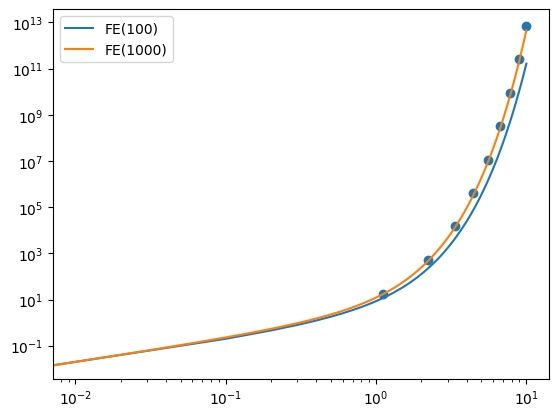

In [4]:
U_0 = 0.0
I = 0
B = 10


def dudx(u_n, t_n):
    return 3 * u_n + 2


f_int = lambda x: 2 * np.exp(3 * x) / 3 - 2 / 3
x = np.linspace(I, B, 10)
y = f_int(x)
plt.scatter(x, y)

# * sends both t and u to the plot() function
plt.plot(*ode_FE(dudx, I, B, U_0, N=int(100)), label="FE(100)")
plt.plot(*ode_FE(dudx, I, B, U_0, N=int(1000)), label="FE(1000)")

plt.yscale("log")
plt.xscale("log")
plt.legend()

plt.show()

-   1-D CR: let's implement the $\theta$-rule. For the solving of the equation for $u^{n+1}$, we use the Newton-Raphson method implemented in the `scipy.optimize`.

$$
u^{n+1} - \Delta t \theta f(u^{n+1},t_{n+1}) = u^n + \Delta t(1-\theta)f(u^n, t_n)
$$


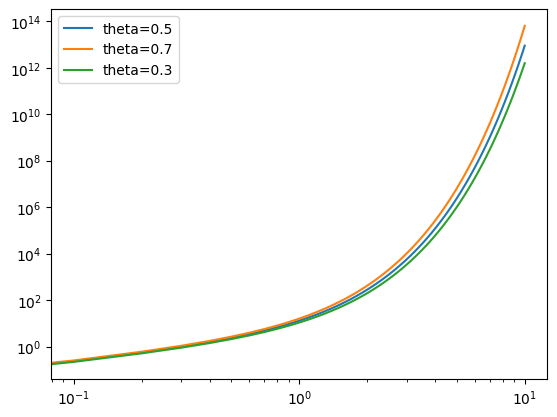

In [5]:
from functools import partial

import scipy.optimize as spo


def ode_theta(f, A, B, U_0, N, theta=0.5):
    """
    f: dy/dx = f(x, y)
    A, B: boundary
    U_0: initial value at A
    N: int for num of intervals
    theta: theta rule parameter
    """
    u = np.zeros(N + 1)
    t = np.linspace(A, B, N + 1)
    dt = (B - A) / N
    u[0] = U_0
    dpp = lambda dt, theta, t_n, u_n, t_n_1, u_n_1: (
        u_n_1 - dt * theta * f(u_n_1, t_n_1) - u_n - dt * (1 - theta) * f(u_n, t_n)
    )
    for n in range(N):
        u[n + 1] = spo.newton(partial(dpp, dt, theta, t[n], u[n], t[n + 1]), u[n])
    return t, u


plt.plot(*ode_theta(dudx, I, B, U_0, N=int(100)), label="theta=0.5")
plt.plot(*ode_theta(dudx, I, B, U_0, N=int(100), theta=0.7), label="theta=0.7")
plt.plot(*ode_theta(dudx, I, B, U_0, N=int(100), theta=0.3), label="theta=0.3")

plt.yscale("log")
plt.xscale("log")
plt.legend()

plt.show()

-   1-D Crank-Nicolson Scheme with approximation for explicit solution


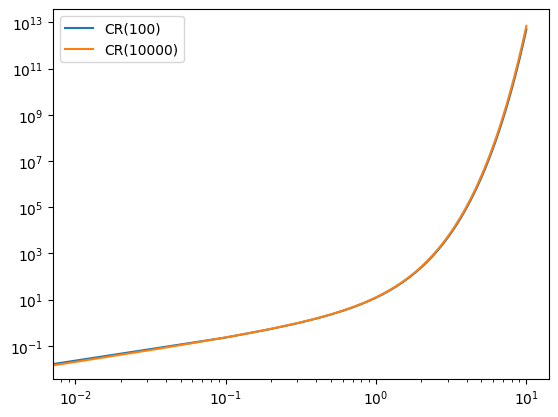

In [6]:
import numpy as np


def ode_CR(f, A, B, U_0, N):
    """
    f: dy/dx = f(x, y)
    A, B: boundary
    U_0: initial value at A
    N: int for num of intervals
    """
    u = np.zeros(N + 1)
    t = np.linspace(A, B, N + 1)

    h = (B - A) / N
    h_2 = h / 2
    u[0] = U_0
    for n in range(N):
        # initial version
        # u[n+1] = u[n] + h_2*(f(u[n], t[n])+f(u[n]+dt*f(u[n], t[n]),t[n+1]))

        # Re-write to avoid double calculation
        f_u_n = f(u[n], t[n])
        u[n + 1] = u[n] + h_2 * (f_u_n + f(u[n] + h * f_u_n, t[n + 1]))
    return t, u


plt.plot(*ode_CR(dudx, I, B, U_0, N=int(100)), label="CR(100)")
plt.plot(*ode_CR(dudx, I, B, U_0, N=int(1000)), label="CR(10000)")

plt.yscale("log")
plt.xscale("log")
plt.legend()

plt.show()

Let's compare the Forward Euler (FE), Crank-Nicolson Approximation (CR_approx), and $\theta$-rule methods when applied to the differential equation $y' = 0.1y$. We use a small number of steps (6) to make the differences more visible.


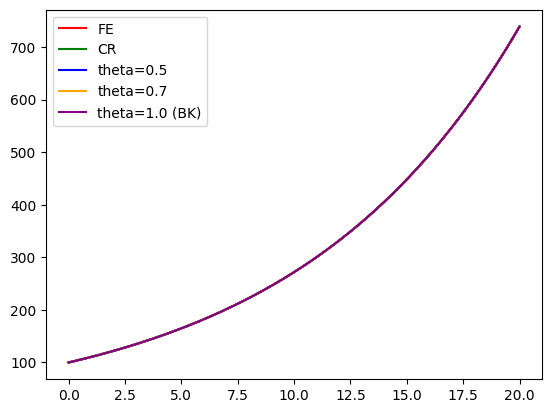

In [7]:
def demo_population_growth(ode_func, col, label, **kwargs):
    """Test case: u'=r*u, u(0)=100."""

    def f(u, t):
        return 0.1 * u

    t, u = ode_func(f=f, A=0, B=20, U_0=100, N=10000, **kwargs)
    plt.plot(t, u, col, label=label)

    return t, u


if __name__ == "__main__":
    demo_population_growth(ode_FE, "r-", "FE")
    t, _ = demo_population_growth(ode_CR, "g-", "CR")
    plt.plot(t, 100 * np.exp(0.1 * t), "k--")
    demo_population_growth(ode_theta, "b-", "theta=0.5")
    demo_population_growth(ode_theta, "orange", "theta=0.7", theta=0.7)
    demo_population_growth(ode_theta, "purple", "theta=1.0 (BK)", theta=1.0)
    plt.legend()
    plt.show()

#### Comparing Numerical Methods with $y' = \sin(x)$

Let's apply different numerical methods to a new differential equation, $y' = \sin(x)$, and compare their performance.

We can observe that CR could attenuate the oscillation of the solution, while FE scheme does not.

The CR method, being an implicit method, tends to be more stable and can handle oscillatory solutions more effectively. On the other hand, the FE method, being an explicit method, might not handle oscillations as well, especially for larger time steps.


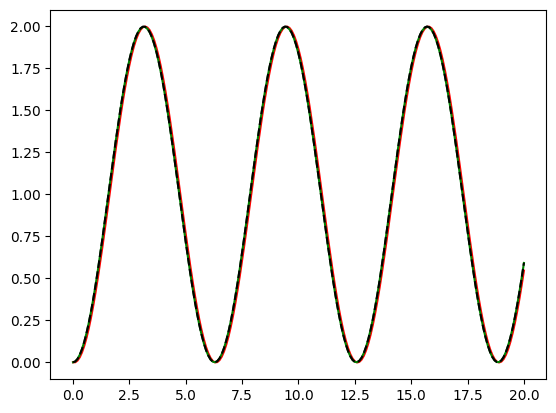

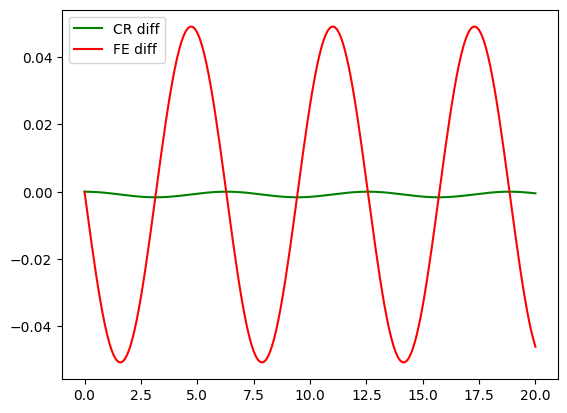

In [8]:
def demo_sin(ode_func, col):
    def f(u, t):
        return np.sin(t)

    t, u = ode_func(f=f, A=0, B=20, U_0=0, N=200)
    plt.plot(t, u, col)
    return t, u


if __name__ == "__main__":
    t_fe, u_fe = demo_sin(ode_FE, "r-")
    t_cr, u_cr = demo_sin(ode_CR, "g-")
    plt.plot(t_fe, 1 - np.cos(t_fe), "k--")
    plt.show()

    plt.plot(t_fe, u_cr - (1 - np.cos(t_fe)), "g-", label="CR diff")
    plt.plot(t_fe, u_fe - (1 - np.cos(t_fe)), "r-", label="FE diff")
    plt.legend()
    plt.show()

#### 2.3.3 Solver for ODE Equations

When dealing with systems of equations, we can apply numerical solvers in a similar way as for single equations. For instance, consider the system:

$$
\begin{aligned}
u^{n+1} & = u^{n} + h f(u^n, v^n, t^n) \\
v^{n+1} & = v^{n} + h f(u^n, v^n, t^n) \\
\dotsb & = \dotsb
\end{aligned}
$$

We can generalize this to a single vector equation:

$$
\vec{u^{n+1}} = \vec{u^{n}} + h f(\vec{u^n}, t^n)
$$

Here, $\vec{u^n}$ represents the vector of all variables at the n-th step, and $f(\vec{u^n}, t^n)$ represents the vector of their derivatives. This formula provides a general method to update all variables at each step, given their current states and the current time.

For example, if we have a system of two differential equations $u' = u + v$ and $v' = u - v$, with initial conditions $u(0) = 1$ and $v(0) = 0$, we could update $u$ and $v$ at each step as $\vec{u^{n+1}} = \vec{u^n} + h \cdot (u^n + v^n, u^n - v^n)$.


In [9]:
def ode_FE2(f, A, B, U_0, N):
    """
    f: dy/dx = f(x, y) !New!
    A, B: boundary
    U_0: initial value at A
    N: int for num of intervals
    """
    f_ = lambda u, t: np.array(f(u, t))
    u = np.zeros((N + 1, len(U_0)))
    t = np.linspace(A, B, N + 1)

    h = (B - A) / N
    # u is of shape (N+1, len(U_0))
    # u of (N+1, 2)
    # U_0 of (2,)
    u[0] = U_0  # n-D array
    try:
        for n in range(N):
            u[n + 1] = u[n] + h * f_(u[n], t[n])
    except:
        print(f"u[n]:{u[n]} f_(u[n], t[n]):{f_(u[n], t[n])}")
        raise
    return t, u


def ode_CR2(f, A, B, U_0, N):
    """
    f: dy/dx = f(x, y) !New!
    A, B: boundary
    U_0: initial value at A
    N: int for num of intervals
    """
    f_ = lambda u, t: np.array(f(u, t))
    u = np.zeros((N + 1, len(U_0)))
    t = np.linspace(A, B, N + 1)
    dt = (B - A) / N
    dt_2 = dt / 2
    u[0] = U_0
    for n in range(N):
        f_un_tn = f_(u[n], t[n])
        u[n + 1] = u[n] + dt_2 * (f_un_tn + f(u[n] + dt * f_un_tn, t[n + 1]))
    return t, u

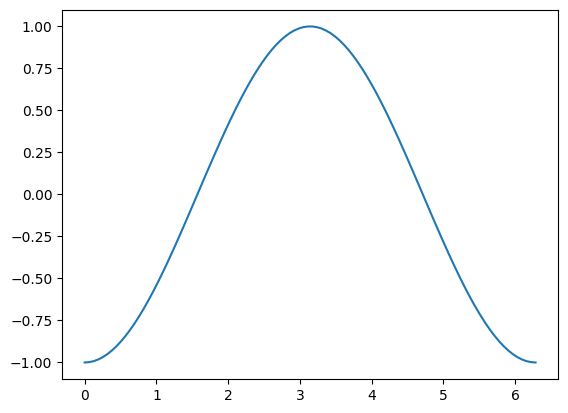

In [10]:
xs = np.linspace(0, np.pi * 2, 100)
ys = -np.cos(xs)
plt.plot(xs, ys)
plt.show()

Consider a point moving at a speed given by $v = \sin(t)$. We want to calculate the distance $S$ it travels over a time period $t$.

We can model this with a system of differential equations:

$$
\begin{aligned}
\frac{dS}{dt} & = v \\
\frac{dv}{dt} & = sin(t) \\
\end{aligned}
$$

The first equation represents the rate of change of distance (speed), and the second equation represents the rate of change of speed.

We can discretize these equations using a time step $dt$ to get:

$$
\begin{aligned}
S_1 & = S_0 + v_1 dt \\
v_1 & = v_0 + sin(t_1) dt
\end{aligned}
$$

Here, $S_1$ and $v_1$ are the distance and speed at the next time step, and $S_0$ and $v_0$ are the current distance and speed.

We can also express this system in terms of a state vector $u = [S, v]$:

$$
\begin{aligned}
\frac{du_0}{dt} & = v \\
\frac{du_1}{dt} & = sin(t)
\end{aligned}
$$

This system can be solved using numerical methods like the Euler method or the Runge-Kutta method to find the distance traveled over time.


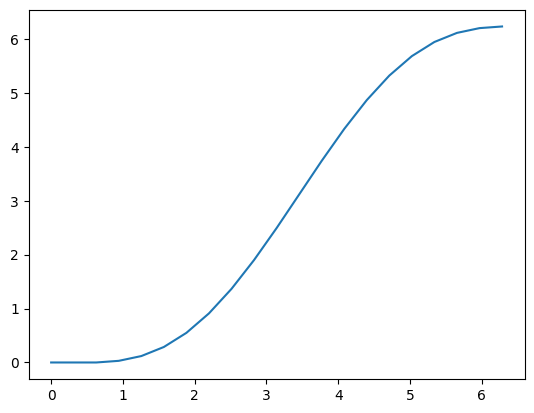

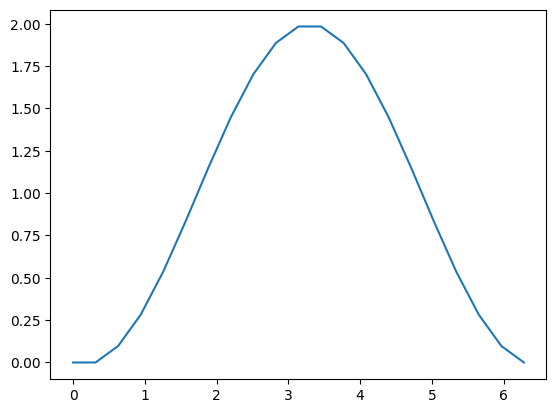

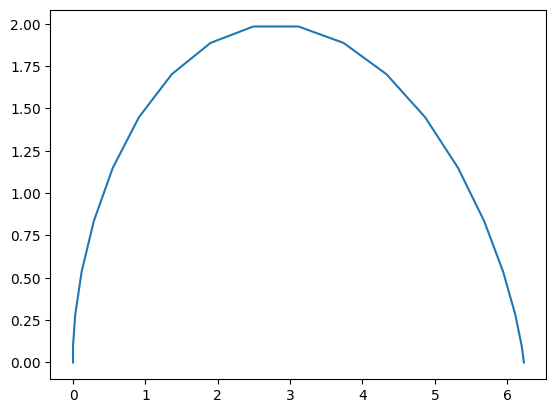

In [11]:
t, u = ode_FE2(
    f=lambda u, t: [u[1], np.sin(t)], A=0, B=np.pi * 2, U_0=np.array([0, 0]), N=20
)

# S vs. t:
plt.plot(t, [x[0] for x in u])
plt.show()


# v vs. t: looks like -cos(x) because -cos(x) is the integration of sin(x)
plt.plot(t, [x[1] for x in u])
plt.show()

# S vs. v
plt.plot([x[0] for x in u], [x[1] for x in u])
plt.show()


Consider an object moving in a circular path with a constant speed $v = 1$. The motion can be described by the following system of differential equations:

$$
\begin{aligned}
v & = 1 \\
\frac{dy}{dt} & = v \cdot cos(t) \\
\frac{dx}{dt} & = -v \cdot sin(t)
\end{aligned}
$$

Here, $x$ and $y$ represent the coordinates of the object at any time $t$. These equations capture the essence of circular motion: the object moves in the $y$ direction with a speed modulated by $\cos(t)$, and in the $x$ direction with a speed modulated by $-\sin(t)$.

For instance, if we want to find the position of the object at time $t = \pi/2$, we could integrate these equations from $t = 0$ to $t = \pi/2$ using a numerical method like the Euler method or the Runge-Kutta method.


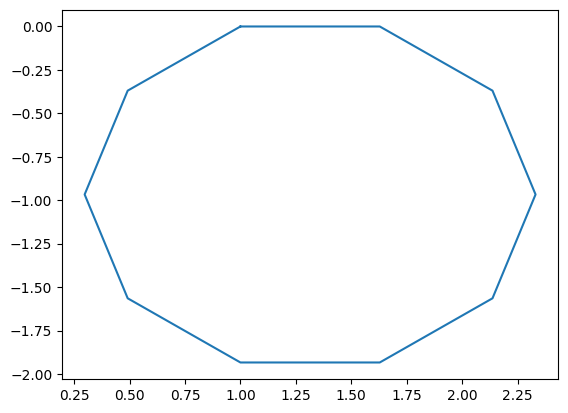

In [12]:
t, u = ode_FE2(
    f=lambda u, t: [np.cos(t), -np.sin(t)], A=0, B=np.pi * 2, U_0=np.array([1, 0]), N=10
)
X = u[:, 0]

Y = u[:, 1]

# plt.scatter(X, Y)

plt.plot(X, Y)

plt.show()

#### Re-feed Technique in Forward Euler Scheme

In systems of equations, the re-feed technique can be useful. It involves using the result from a previous equation as input to the next.

Consider the Forward Euler Scheme with re-feed:

$$
\begin{aligned}
u^{n+1} & = u^{n} + h f(u^n, v^n, t^n) \\
v^{n+1} & = v^{n} + h f(u^{n+1}, v^n, t^n) \\
\dotsb & = \dotsb
\end{aligned}
$$

In this system, the updated value of $u$, $u^{n+1}$, is used as input to the function $f$ in the equation for updating $v$. This is the essence of the re-feed technique.


In [13]:
# With Re-feed
def ode_FE3(f, A, B, U_0, N):
    """
    f: dy/dx = f(x, y)
    A, B: boundary
    U_0: initial value at A
    N: int for num of intervals
    """
    X_len = len(U_0)
    f_ = lambda u, t: np.array(f(u, t))
    u = np.zeros((N + 1, X_len))
    t = np.linspace(A, B, N + 1)

    h = (B - A) / N
    u[0] = U_0
    try:
        for n in range(N):
            u[n + 1] = u[n]
            for m in range(X_len):
                u[n + 1][m] = (u[n] + h * f_(u[n + 1], t[n]))[m]
    except:
        print(f"u[n]:{u[n]} f_(u[n], t[n]):{f_(u[n], t[n])}")
        raise
    return t, u


# With Re-feed
def ode_CR3(f, A, B, U_0, N):
    """
    f: dy/dx = f(x, y)
    A, B: boundary
    U_0: initial value at A
    N: int for num of intervals
    """
    X_len = len(U_0)
    f_ = lambda u, t: np.array(f(u, t))
    u = np.zeros((N + 1, X_len))
    t = np.linspace(A, B, N + 1)
    h = (B - A) / N
    h_2 = h / 2
    u[0] = U_0
    for n in range(N):
        u[n + 1] = u[n]
        for m in range(X_len):
            u[n + 1][m] = (
                u[n]
                + h_2 * (f_(u[n], t[n]) + f(u[n] + h * f_(u[n + 1], t[n]), t[n + 1]))
            )[m]
    return t, u

#### Applying Different Methods to the Pendulum Problem

Consider a simple pendulum problem, modeled by the following system of differential equations:

$$
\begin{aligned}
u' & = v \\
v' & = -\omega^2 u
\end{aligned}
$$

Here, $u$ represents the angular displacement of the pendulum, $v$ is the angular velocity, and $\omega$ is the natural frequency of the pendulum.

These formulas provide a way to update the angular displacement and velocity at each time step, given their current values and the time step size $h$


In [14]:
def demo_pen(ode_func, fig, steps=20):
    def f(x, t):
        u, v = x
        return [v, -(omega**2) * u]

    omega = 1
    P = 2 * np.pi / omega
    dt = P / steps
    T = 3 * P
    N_t = int(round(T / dt))
    print("N_t:", N_t)
    X_0 = 3
    Y_0 = 0
    U_0 = [X_0, Y_0]

    t, u = ode_func(f=f, A=0, B=T, U_0=U_0, N=N_t)
    X = u[:, 0]
    Y = u[:, 1]
    # fig = plt.figure()
    # l1, l2 = fig.plot(t, X, 'b-', t, X_0*np.cos(omega*t), 'r--')
    # fig.legend((l1, l2), ('numerical', 'exact'), 'upper left')
    l1, l2 = fig.plot(t, X, "b-", t, X_0 * np.cos(omega * t), "r--")
    # print(l1,l2)
    fig.legend((l1, l2), ("numerical", "exact"))
    fig.set_title(f"Steps={steps}")
    return fig

N_t: 60
N_t: 60
N_t: 60
N_t: 60


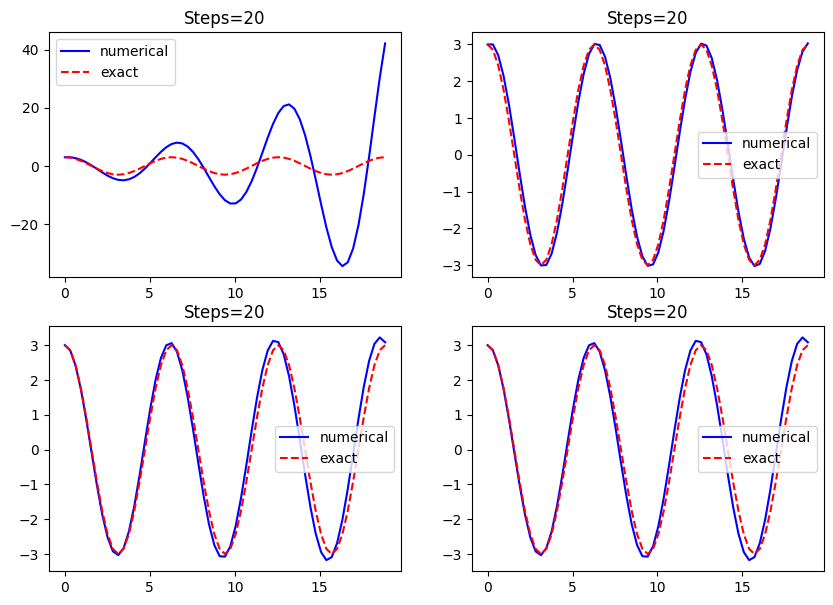

N_t: 300
N_t: 300
N_t: 300
N_t: 300


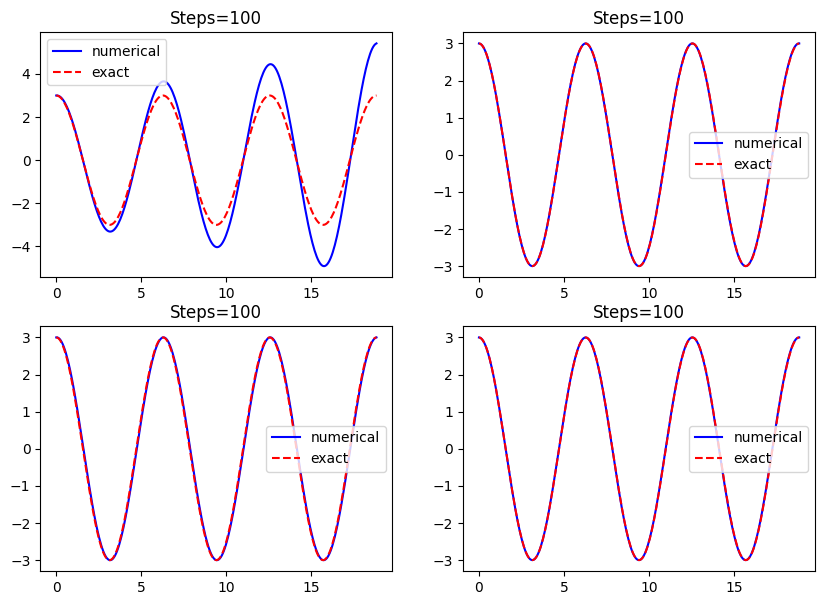

In [15]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 7))
demo_pen(ode_FE2, f1_axes[0, 0])
demo_pen(ode_FE3, f1_axes[0, 1])
demo_pen(ode_CR2, f1_axes[1, 0])
demo_pen(ode_CR3, f1_axes[1, 1])
plt.show()

fig1, f1_axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 7))
demo_pen(ode_FE2, f1_axes[0, 0], steps=100)
demo_pen(ode_CR2, f1_axes[0, 1], steps=100)
demo_pen(ode_FE3, f1_axes[1, 0], steps=100)
demo_pen(ode_CR3, f1_axes[1, 1], steps=100)
plt.show()

#### 2.3.4 Exercise

##### Q1

1. Use the Crank-Nicolson (CR) method to model a circular motion described by a system of ODEs. Solve it for a circular path. You may start from the point $[2, 0]$ with a linear speed of $v=1$ per second.

2. Define "Leakage" as the offset (the distance between the endpoint and the start point) after completing one full circular movement. Write a function that takes a tolerance as input and determines the number of steps required to satisfy this tolerance after completing one round. Solve for tolerances of 1, 1e-8, and 1e-12.

The figure below illustrates how each method works (Forward Euler on top, Crank-Nicolson on the bottom).

![Circular Motion with FE and CR methods](img/07/ode_circle.png)

Note: The figure shows the path of the point as it moves in a circular motion. The Forward Euler method may result in a spiral path due to numerical errors, while the Crank-Nicolson method should result in a more accurate circular path.


N_t: 10
N_t: 10
N_t: 10
N_t: 10


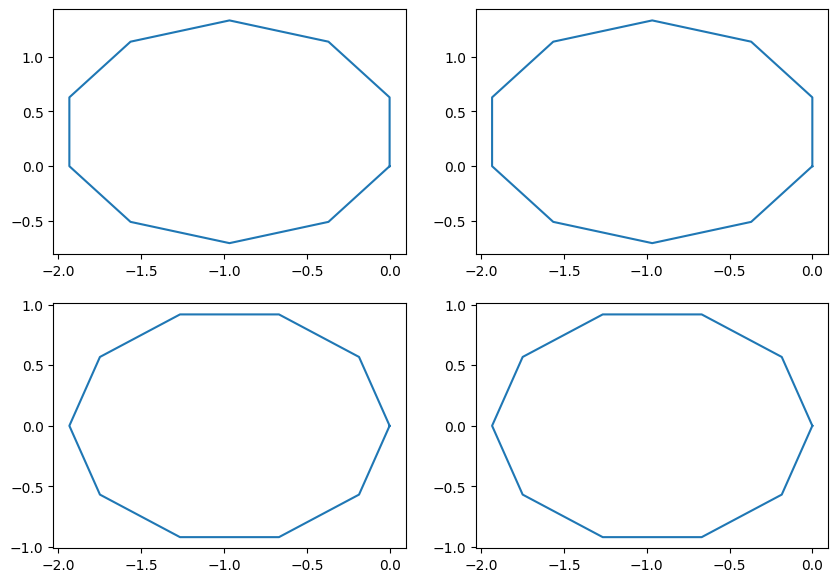

In [16]:
def demo_circle(ode_func, fig, steps=10):
    V = 1

    def f(x, t):
        u, v = x
        return [-V * np.sin(t), V * np.cos(t)]

    P = 2 * np.pi
    dt = P / steps
    T = P
    N_t = int(round(T / dt))
    print("N_t:", N_t)
    X_0 = 0
    Y_0 = 0
    U_0 = [X_0, Y_0]
    t, u = ode_func(f=f, A=0, B=T, U_0=U_0, N=N_t)
    X = u[:, 0]
    Y = u[:, 1]
    l1 = fig.plot(X, Y)
    # fig.scatter(X, Y)
    return fig


fig1, f1_axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 7))
demo_circle(ode_FE2, f1_axes[0, 0], steps=10)
demo_circle(ode_FE3, f1_axes[0, 1])
demo_circle(ode_CR2, f1_axes[1, 0])
demo_circle(ode_CR3, f1_axes[1, 1])
plt.show()

In [17]:
def f(x, t):
    u, v = x
    sq = np.sqrt(u**2 + v**2)
    return [-v / sq, u / sq]


T = 2 * np.pi * 2
## dt = np.pi / 200
dt = 1e-2
N_t = int(round(T / dt))
print("N_t:", N_t)
X_0 = 2
Y_0 = 0
U_0 = [X_0, Y_0]

N_t: 1257


##### Q2: SIR Model: Dynamics of Susceptible and Infected Individuals

The SIR model is a classic model for disease spread. We'll focus on the 'S' (Susceptible) and 'I' (Infected) parts of the model.

-   $S = S(t)$ represents the number of susceptible individuals.
-   $I = I(t)$ represents the number of infected individuals.
    The dynamics of these populations are governed by the following differential equations:

Susceptible Equation: $$ \frac {dS} {dt} = -b S I $$

Infected Equation: $$ \frac {dI} {dt} = b S I - k I $$

$k$ is an estimate for the average period of infectiousness. If it is three days, it would suggest $k = 1/3$.

$b$ is an estimate for each infected would make a possibly infecting contact, normalized by the number of population. If it is every half day for a population of 1000, it would suggest $b = 1/0.5/1000 = 0.002$.

Use $dt = 0.01$ for total time $T = 20$, initial condition of $[999, 1]$ for $[S, I]$ to visualize the dynamic of $S$ and $I$ with respect to $T$. Find out time $T_{peak}$ when $I$ is peaked.


##### Appendix: timestamp


In [18]:
from datetime import datetime

print(f"Generated on {datetime.now()}")

Generated on 2024-03-07 12:20:25.816646
